In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import plotly.express as px
from yellowbrick.model_selection import FeatureImportances

%matplotlib inline
sns.set_style("white")

# for modeling
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# for feature engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import CategoricalImputer
from sklearn.impute import KNNImputer
from feature_engine.encoding import RareLabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#import pandas_profiling
#pandas_profiling.ProfileReport(Ames).to_file("Ames_Report.html") 

In [3]:
Ames = pd.read_csv('train.csv', keep_default_na=False,na_values='')
Ames = Ames.drop(['Id', 'PID'], axis=1)

Ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


###  eda

In [4]:
Ames.shape

(2051, 79)

In [5]:
for each in Ames.columns:
    if Ames[each].isnull().sum() > 0:
        print(each,'is missing', Ames[each].isnull().sum(), 'observations.')

Lot Frontage is missing 330 observations.
Mas Vnr Type is missing 22 observations.
Mas Vnr Area is missing 22 observations.
Bsmt Qual is missing 1 observations.
Bsmt Cond is missing 1 observations.
Bsmt Exposure is missing 4 observations.
BsmtFin Type 1 is missing 1 observations.
BsmtFin SF 1 is missing 1 observations.
BsmtFin Type 2 is missing 2 observations.
BsmtFin SF 2 is missing 1 observations.
Bsmt Unf SF is missing 1 observations.
Total Bsmt SF is missing 1 observations.
Bsmt Full Bath is missing 2 observations.
Bsmt Half Bath is missing 2 observations.
Garage Yr Blt is missing 114 observations.
Garage Finish is missing 1 observations.
Garage Cars is missing 1 observations.
Garage Area is missing 1 observations.
Garage Qual is missing 1 observations.
Garage Cond is missing 1 observations.


#### numerical variables

In [6]:
#  list of numerical variables
numerical = [each for each in Ames.columns if Ames[each].dtype=='int64' or Ames[each].dtype=='float64']
print(f'There are {len(numerical)} numerical variables')
Ames[numerical].head()

There are 37 numerical variables


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


#### categorical variables

In [7]:
categorical = [each for each in Ames.columns if Ames[each].dtype=='object']
print(f'There are {len(categorical)} categorical variables')
Ames[categorical].head()

There are 42 categorical variables


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD


#### temporal variables

In [8]:
year_data = [each for each in numerical if 'Yr' in each or 'Year' in each]
Ames[year_data].head()

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold
0,1976,2005,1976.0,2010
1,1996,1997,1997.0,2009
2,1953,2007,1953.0,2010
3,2006,2007,2007.0,2010
4,1900,1993,1957.0,2010


In [9]:
Ames['Year Built'] = Ames['Yr Sold'] - Ames['Year Built']
Ames['Year Remod/Add'] = Ames['Yr Sold'] - Ames['Year Remod/Add']
Ames['Garage Yr Blt'] = Ames['Yr Sold'] - Ames['Garage Yr Blt']

Ames[['Year Built', 'Year Remod/Add', 'Garage Yr Blt']].head()

,Year Built,Year Remod/Add,Garage Yr Blt
0,34,5,34.0
1,13,12,12.0
2,57,3,57.0
3,4,3,3.0
4,110,17,53.0


Instead of the "year", now we have the amount of **years that passed** since the house was built or remodeled and the house was sold. Later we will drop the YrSold variable from the datasets, because we already extracted its value.

In [10]:
# Ames['TotalLivingSF'] = Ames['Gr Liv Area'] + Ames['Total Bsmt SF'] - Ames['Low Qual Fin SF']

In [11]:
# Ames['TotalLivingSF'] = Ames['TotalLivingSF'].mean()

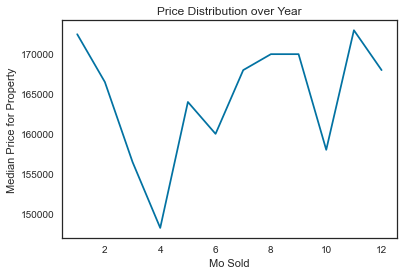

In [12]:
Ames.groupby('Mo Sold')['SalePrice'].median().plot()
plt.title('Price Distribution over Year')
plt.ylabel('Median Price for Property');

#### discrete variables

In [13]:
# let's visualise the values of the discrete variables
discrete = []

for each in numerical:
    if len(Ames[each].unique()) < 20 and each not in year_data:
        print(each,' values - ', Ames[each].unique())
        discrete.append(each)
print()
print(f'There are {len(discrete)} discrete variables')

MS SubClass  values -  [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
Overall Qual  values -  [ 6  7  5  8 10  4  9  3  2  1]
Overall Cond  values -  [8 5 7 6 3 9 2 4 1]
Bsmt Full Bath  values -  [ 0.  1.  2. nan  3.]
Bsmt Half Bath  values -  [ 0.  1. nan  2.]
Full Bath  values -  [2 1 3 0 4]
Half Bath  values -  [1 0 2]
Bedroom AbvGr  values -  [3 4 2 5 1 0 6 8]
Kitchen AbvGr  values -  [1 2 0 3]
TotRms AbvGrd  values -  [ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
Fireplaces  values -  [0 1 2 4 3]
Garage Cars  values -  [ 2.  1.  3.  0.  4.  5. nan]
Pool Area  values -  [  0 519 576 800 228 480 648 738 368 561]
Mo Sold  values -  [ 3  4  1  6  5  9  7  2 12 10 11  8]

There are 14 discrete variables


#### continuous variables

In [14]:
numerical = [each for each in numerical if each not in discrete and each not in ['SalePrice'] and each not in year_data]
print(f'There are {len(numerical)} numerical and continuous variables')

There are 18 numerical and continuous variables


#### outliers and distributions

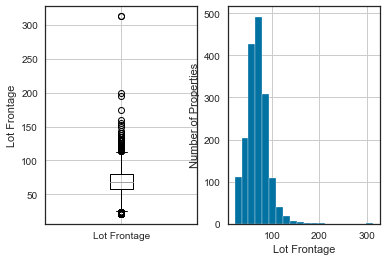

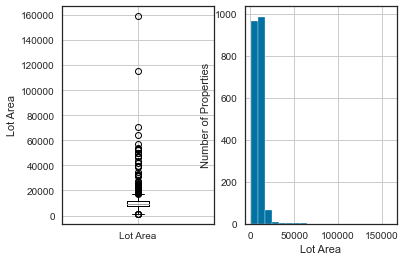

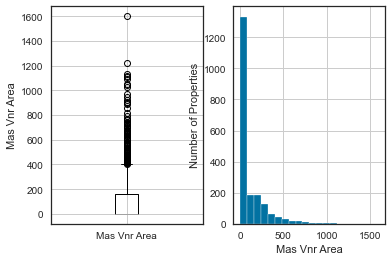

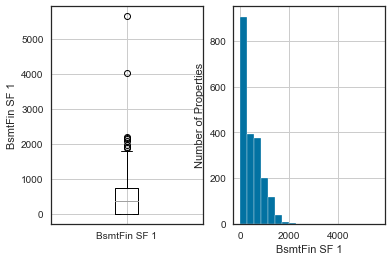

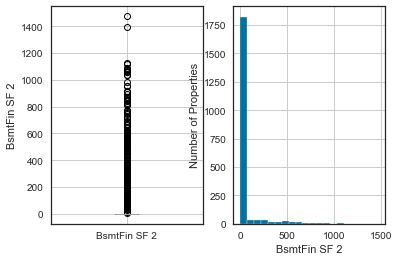

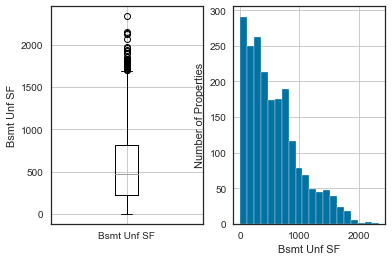

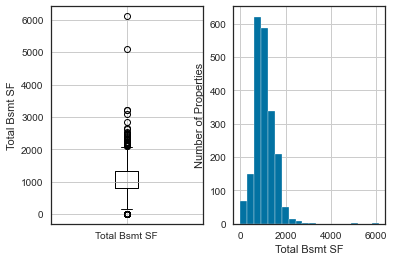

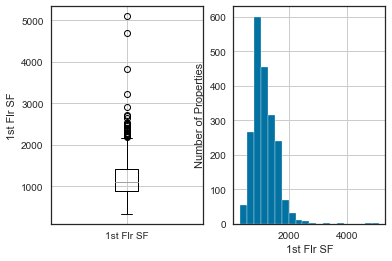

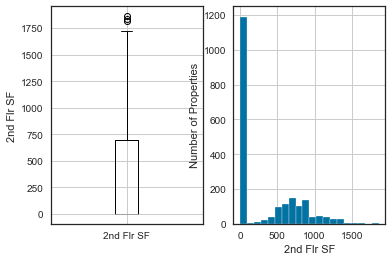

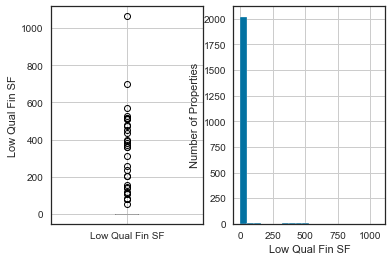

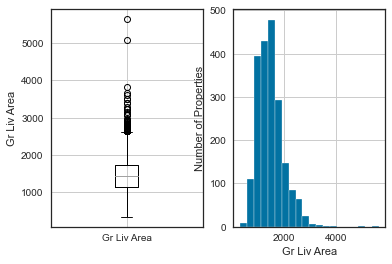

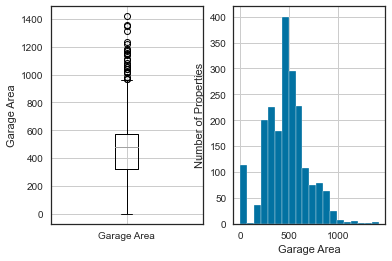

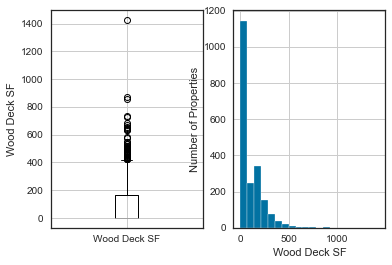

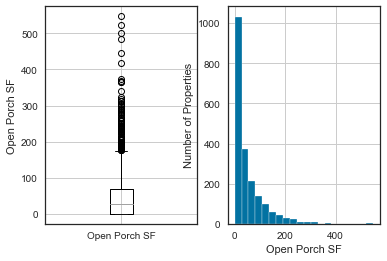

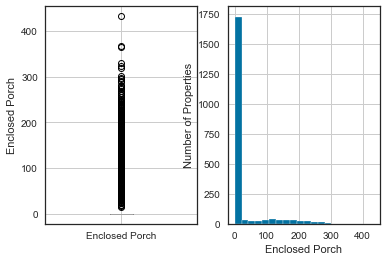

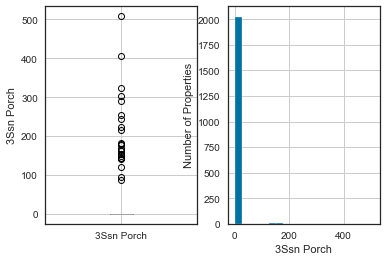

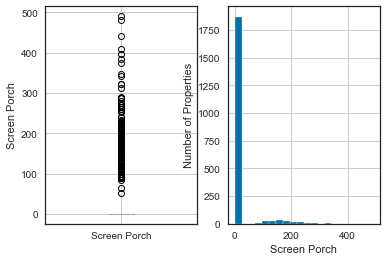

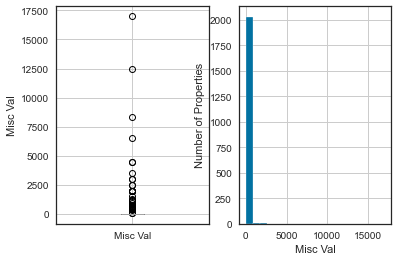

In [15]:
for each in Ames[numerical]:
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    fig = Ames.boxplot(column=each)
    fig.set_title('')
    fig.set_ylabel(each)
    
    plt.subplot(1, 2, 2)
    fig = Ames[each].hist(bins=20)
    fig.set_ylabel('Number of Properties')
    fig.set_xlabel(each)

    plt.show()

#### outliers in discrete variables

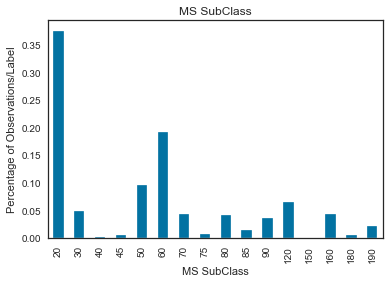

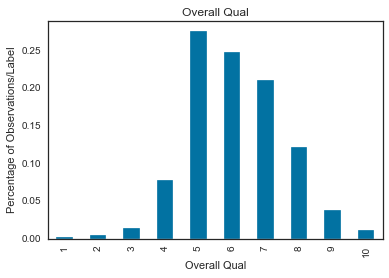

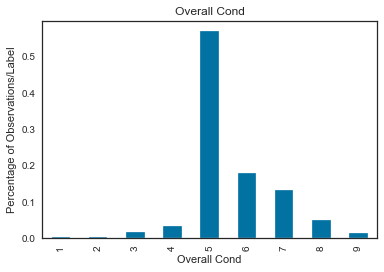

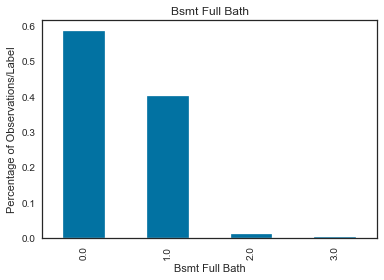

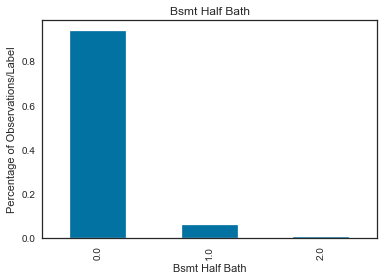

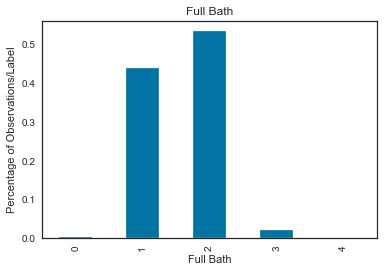

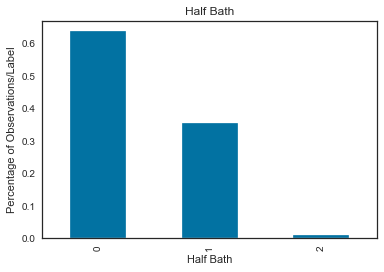

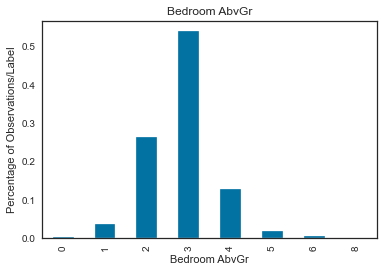

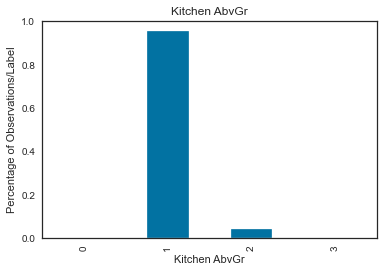

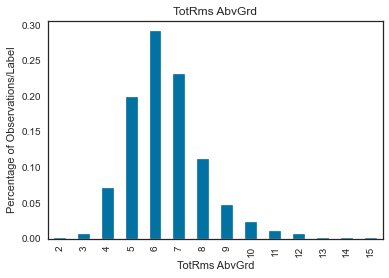

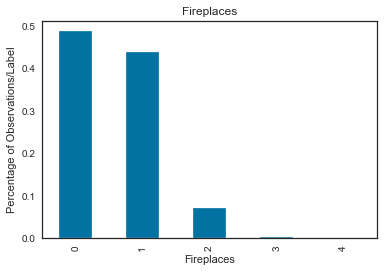

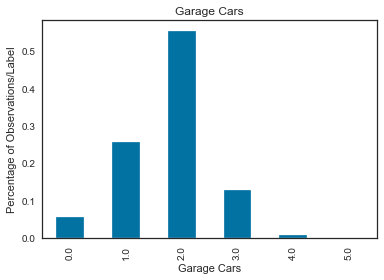

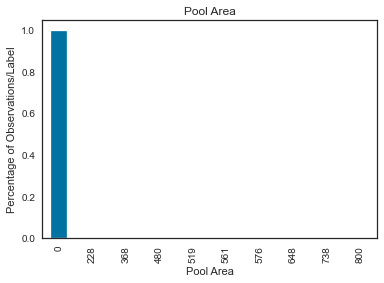

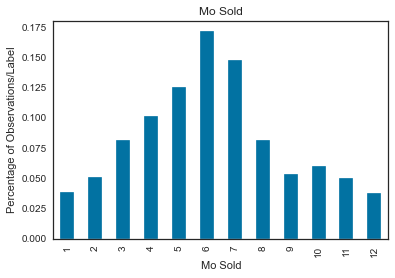

In [16]:
for each in discrete:
    (Ames.groupby(each)[each].count() / np.float(len(Ames))).plot.bar()
    plt.ylabel('Percentage of Observations/Label')
    plt.title(each)
    plt.show()

#### cardinality check

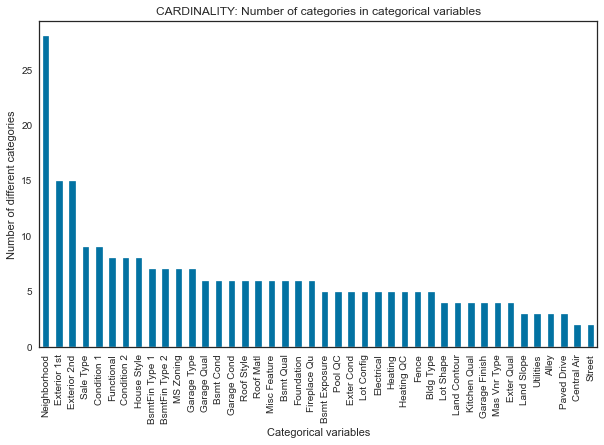

In [17]:
Ames[categorical].nunique().sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.title('CARDINALITY: Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories');

# most of the variables contain few labels so no high cardinality

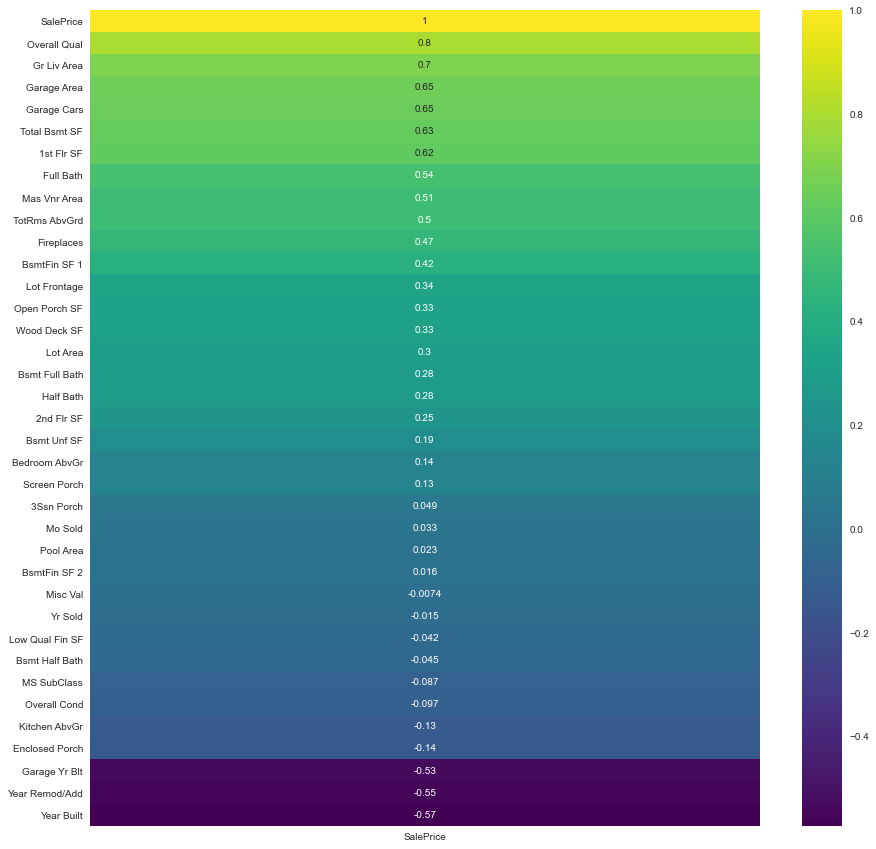

In [18]:
plt.figure(figsize=(15,15))
corr = Ames.corr().sort_values(['SalePrice'], ascending=False)
sns.heatmap(corr[['SalePrice']],annot=True, cmap='viridis');

In [19]:
Ames.drop('Yr Sold', axis=1,inplace=True)

###  imputation for numerical variables


In [20]:
#  list of numerical variables
numerical = [each for each in Ames.columns if Ames[each].dtype=='int64' or Ames[each].dtype=='float64']
print(f'There are {len(numerical)} numerical variables')
Ames[numerical].head()

There are 36 numerical variables


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,SalePrice
0,60,NaN,13517,6,8,34,5,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,34.0,2.0,475.0,0,44,0,0,0,0,0,3,130500
1,60,43.0,11492,7,5,13,12,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,12.0,2.0,559.0,0,74,0,0,0,0,0,4,220000
2,20,68.0,7922,5,7,57,3,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,57.0,1.0,246.0,0,52,0,0,0,0,0,1,109000
3,60,73.0,9802,5,5,4,3,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,3.0,2.0,400.0,100,0,0,0,0,0,0,4,174000
4,50,82.0,14235,6,8,110,17,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,53.0,2.0,484.0,0,59,0,0,0,0,0,3,138500


In [21]:
for each in Ames[numerical].columns:
    if Ames[each].isnull().sum() > 0:
        print(each,'is missing', Ames[each].isnull().sum(), 'observations.')

Lot Frontage is missing 330 observations.
Mas Vnr Area is missing 22 observations.
BsmtFin SF 1 is missing 1 observations.
BsmtFin SF 2 is missing 1 observations.
Bsmt Unf SF is missing 1 observations.
Total Bsmt SF is missing 1 observations.
Bsmt Full Bath is missing 2 observations.
Bsmt Half Bath is missing 2 observations.
Garage Yr Blt is missing 114 observations.
Garage Cars is missing 1 observations.
Garage Area is missing 1 observations.


In [22]:
knn_imputer = KNNImputer(weights='distance', n_neighbors=5)

In [23]:
knn_imputer.fit(Ames[numerical])

KNNImputer(weights='distance')

In [24]:
Ames[numerical] = knn_imputer.transform(Ames[numerical])
Ames[numerical] = pd.DataFrame(Ames[numerical], columns=Ames[numerical].columns)
Ames[numerical].head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,SalePrice
0,60.0,72.940254,13517.0,6.0,8.0,34.0,5.0,289.0,533.0,0.0,192.0,725.0,725.0,754.0,0.0,1479.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,0.0,34.0,2.0,475.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,3.0,130500.0
1,60.0,43.000000,11492.0,7.0,5.0,13.0,12.0,132.0,637.0,0.0,276.0,913.0,913.0,1209.0,0.0,2122.0,1.0,0.0,2.0,1.0,4.0,1.0,8.0,1.0,12.0,2.0,559.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,4.0,220000.0
2,20.0,68.000000,7922.0,5.0,7.0,57.0,3.0,0.0,731.0,0.0,326.0,1057.0,1057.0,0.0,0.0,1057.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,57.0,1.0,246.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,1.0,109000.0
3,60.0,73.000000,9802.0,5.0,5.0,4.0,3.0,0.0,0.0,0.0,384.0,384.0,744.0,700.0,0.0,1444.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,0.0,3.0,2.0,400.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,174000.0
4,50.0,82.000000,14235.0,6.0,8.0,110.0,17.0,0.0,0.0,0.0,676.0,676.0,831.0,614.0,0.0,1445.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,53.0,2.0,484.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,3.0,138500.0


### imputation for categorical variables

In [25]:
categorical = [each for each in Ames.columns if Ames[each].dtype=='object']
print(f'There are {len(categorical)} categorical variables')
Ames[categorical].head()

There are 42 categorical variables


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD


In [26]:
for each in Ames.columns:
    if Ames[each].isnull().sum() > 0:
        print(each,'is missing', Ames[each].isnull().sum(), 'observations.')

Mas Vnr Type is missing 22 observations.
Bsmt Qual is missing 1 observations.
Bsmt Cond is missing 1 observations.
Bsmt Exposure is missing 4 observations.
BsmtFin Type 1 is missing 1 observations.
BsmtFin Type 2 is missing 2 observations.
Garage Finish is missing 1 observations.
Garage Qual is missing 1 observations.
Garage Cond is missing 1 observations.


In [27]:
cat_imput = CategoricalImputer()
Ames[categorical] = cat_imput.fit_transform(Ames[categorical])

In [28]:
Ames.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bat

In [29]:
Ames['Pool QC'] = Ames['Pool QC'].replace('NaN', 'NA')

### encoding for ordinal features

In [30]:
Ames.rename(columns= {'Overall Cond': 'Overall_Cond',
                            'Overall Qual': 'Overall_Qual'}, inplace=True)

In [31]:
Ames['Overall_Cond'] = Ames.Overall_Cond.astype('O')
Ames['Overall_Qual'] = Ames.Overall_Qual.astype('O')


# must recast these 2 numerical variables as objects for ordinal encoder to transform

In [32]:
cat_ordinal = Ames[['Lot Shape','Land Slope','Overall_Qual','Overall_Cond',
               'Exter Cond','Exter Qual','Bsmt Qual','Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1',
              'BsmtFin Type 2','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond',
              'Pool QC']]

cat_ordinal.head()

,Lot Shape,Land Slope,Overall_Qual,Overall_Cond,Exter Cond,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC
0,IR1,Gtl,6,8,TA,Gd,TA,TA,No,GLQ,Unf,Ex,Gd,NA,TA,TA,NA
1,IR1,Gtl,7,5,TA,Gd,Gd,TA,No,GLQ,Unf,Ex,Gd,TA,TA,TA,NA
2,Reg,Gtl,5,7,Gd,TA,TA,TA,No,GLQ,Unf,TA,Gd,NA,TA,TA,NA
3,Reg,Gtl,5,5,TA,TA,Gd,TA,No,Unf,Unf,Gd,TA,NA,TA,TA,NA
4,IR1,Gtl,6,8,TA,TA,Fa,Gd,No,Unf,Unf,TA,TA,NA,TA,TA,NA


In [33]:
cat_ordinal.dtypes

Lot Shape         object
Land Slope        object
Overall_Qual      object
Overall_Cond      object
Exter Cond        object
Exter Qual        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating QC        object
Kitchen Qual      object
Fireplace Qu      object
Garage Qual       object
Garage Cond       object
Pool QC           object
dtype: object

In [34]:
Ames['Pool QC'] = Ames['Pool QC'].replace({'NA':0,
                   'Fa':1,
                   'TA':2,
                   'Gd':3,
                   'Ex':4})

In [35]:
X = Ames.drop(columns=['SalePrice'])
y = Ames['SalePrice']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)
X_train.shape, X_test.shape                

((1435, 77), (616, 77))

In [37]:
X_test['Pool QC'].value_counts(normalize=True)

0    0.996753
4    0.001623
3    0.001623
Name: Pool QC, dtype: float64

In [38]:
X_train['Pool QC'].value_counts()

0    1428
3       3
2       2
1       2
Name: Pool QC, dtype: int64

In [39]:
Ames.groupby('Pool QC')['SalePrice'].mean()

Pool QC
0    181341.522037
1    215500.000000
2    141500.000000
3    216492.500000
4    315000.000000
Name: SalePrice, dtype: float64

In [40]:
rare_encoder = RareLabelEncoder(tol=0.05, 
                                n_categories=5,
                               variables=['MS Zoning','Lot Shape','Land Contour','Lot Config','Neighborhood',
                                         'Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
                                         'Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Exter Qual',
                                         'Exter Cond', 'Foundation','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                                         'BsmtFin Type 1', 'BsmtFin Type 2','Heating','Heating QC','Electrical',
                                         'Kitchen Qual','Functional','Fireplace Qu','Garage Type','Garage Finish',
                                         'Garage Qual','Garage Cond','Fence','Misc Feature','Sale Type'])

In [41]:
rare_encoder.fit(X_train)

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:157: UserWarning: The number of unique categories for variable Lot Shape is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:157: UserWarning: The number of unique categories for variable Land Contour is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:157: UserWarning: The number of unique categories for variable Lot Config is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:157: UserWarning: The number of unique categorie

RareLabelEncoder(n_categories=5,
                 variables=['MS Zoning', 'Lot Shape', 'Land Contour',
                            'Lot Config', 'Neighborhood', 'Condition 1',
                            'Condition 2', 'Bldg Type', 'House Style',
                            'Roof Style', 'Roof Matl', 'Exterior 1st',
                            'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
                            'Exter Cond', 'Foundation', 'Bsmt Qual',
                            'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
                            'BsmtFin Type 2', 'Heating', 'Heating QC',
                            'Electrical', 'Kitchen Qual', 'Functional',
                            'Fireplace Qu', 'Garage Type', 'Garage Finish', ...])

In [42]:
rare_encoder.encoder_dict_

{'MS Zoning': Index(['RL', 'RM', 'FV'], dtype='object'),
 'Lot Shape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 'Land Contour': array(['Lvl', 'Bnk', 'HLS', 'Low'], dtype=object),
 'Lot Config': array(['FR2', 'Inside', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Somerst', 'Edwards', 'Sawyer',
        'Gilbert', 'NridgHt'],
       dtype='object'),
 'Condition 1': Index(['Norm', 'Feedr'], dtype='object'),
 'Condition 2': Index(['Norm'], dtype='object'),
 'Bldg Type': array(['TwnhsE', '1Fam', 'Duplex', '2fmCon', 'Twnhs'], dtype=object),
 'House Style': Index(['1Story', '2Story', '1.5Fin'], dtype='object'),
 'Roof Style': Index(['Gable', 'Hip'], dtype='object'),
 'Roof Matl': Index(['CompShg'], dtype='object'),
 'Exterior 1st': Index(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood'], dtype='object'),
 'Exterior 2nd': Index(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood'], dtype='object'),
 'Mas Vnr Type': array(

In [43]:
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

In [44]:
X_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall_Qual,Overall_Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type
226,120.0,RM,43.353751,4500.0,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Rare,Norm,Norm,TwnhsE,1Story,6,5,10.0,10.0,Hip,CompShg,VinylSd,VinylSd,BrkFace,425.0,TA,TA,PConc,Ex,TA,No,GLQ,883.0,Unf,0.0,341.0,1224.0,GasA,Ex,Y,SBrkr,1224.0,0.0,0.0,1224.0,1.0,0.0,2.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NA,Attchd,10.0,Fin,2.0,402.0,TA,TA,Y,0.0,304.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,6.0,WD
1742,60.0,RL,65.194797,8174.0,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,6.0,6.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,494.0,Unf,0.0,204.0,698.0,GasA,Ex,Y,SBrkr,698.0,644.0,0.0,1342.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,TA,Attchd,6.0,Fin,2.0,393.0,TA,TA,Y,100.0,56.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,5.0,WD
1516,20.0,RL,68.000000,9571.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,3,51.0,51.0,Gable,CompShg,Rare,Rare,None,0.0,TA,Fa,CBlock,TA,Rare,No,Unf,0.0,Unf,0.0,1276.0,1276.0,GasA,TA,Y,FuseA,1276.0,0.0,0.0,1276.0,0.0,0.0,1.0,0.0,3.0,1.0,TA,5.0,Rare,0.0,NA,Attchd,51.0,Unf,1.0,350.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,6.0,Rare
1568,50.0,RM,50.000000,7000.0,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Rare,Norm,Norm,1Fam,1.5Fin,6,7,67.0,57.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,375.0,Unf,0.0,345.0,720.0,GasA,Gd,Y,FuseA,720.0,495.0,0.0,1215.0,0.0,0.0,1.0,0.0,3.0,1.0,Gd,6.0,Typ,0.0,NA,Detchd,42.0,Fin,2.0,720.0,TA,TA,Y,0.0,0.0,30.0,0.0,0.0,0.0,0,MnPrv,NA,0.0,5.0,WD
862,60.0,RL,75.000000,8778.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,1.0,1.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1302.0,1302.0,GasA,Ex,Y,SBrkr,1302.0,528.0,0.0,1830.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,NA,BuiltIn,1.0,RFn,3.0,859.0,TA,TA,Y,0.0,40.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,3.0,WD


In [45]:
mask = X_test['Pool QC'].isna()
X_test.loc[952]

MS SubClass             20
MS Zoning               RL
Lot Frontage            70
Lot Area             18044
Street                Pave
Alley                   NA
Lot Shape              IR1
Land Contour           HLS
Utilities           AllPub
Lot Config         CulDSac
Land Slope             Gtl
Neighborhood          Rare
Condition 1           Norm
Condition 2           Norm
Bldg Type             1Fam
House Style         1Story
Overall_Qual             8
Overall_Cond             5
Year Built              21
Year Remod/Add          21
Roof Style           Gable
Roof Matl          CompShg
Exterior 1st          Rare
Exterior 2nd       Plywood
Mas Vnr Type          None
Mas Vnr Area             0
Exter Qual              Gd
Exter Cond              TA
Foundation          CBlock
Bsmt Qual               Gd
Bsmt Cond               TA
Bsmt Exposure           No
BsmtFin Type 1         Unf
BsmtFin SF 1             0
BsmtFin Type 2         Unf
BsmtFin SF 2             0
Bsmt Unf SF            279
T

In [46]:
X_test['Pool QC'].value_counts(normalize=True)

0    0.996753
4    0.001623
3    0.001623
Name: Pool QC, dtype: float64

In [47]:
ord_encoder = OrdinalEncoder(encoding_method='ordered', variables=['Lot Shape','Land Slope','Overall_Qual','Overall_Cond',
               'Exter Cond','Exter Qual','Bsmt Qual','Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1',
              'BsmtFin Type 2','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond'])

In [49]:
ord_encoder.fit(X_train, y_train)

OrdinalEncoder(variables=['Lot Shape', 'Land Slope', 'Overall_Qual',
                          'Overall_Cond', 'Exter Cond', 'Exter Qual',
                          'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                          'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC',
                          'Kitchen Qual', 'Fireplace Qu', 'Garage Qual',
                          'Garage Cond'])

In [50]:
X_train = ord_encoder.transform(X_train)
X_test = ord_encoder.transform(X_test)

In [ ]:
### manually encode 

#### encoding for norminal features

In [51]:
from feature_engine.encoding import OneHotEncoder

In [52]:
ohe_enc = OneHotEncoder()

In [53]:
ohe_enc.fit(X_train)

OneHotEncoder(variables=['MS Zoning', 'Street', 'Alley', 'Land Contour',
                         'Utilities', 'Lot Config', 'Neighborhood',
                         'Condition 1', 'Condition 2', 'Bldg Type',
                         'House Style', 'Roof Style', 'Roof Matl',
                         'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                         'Foundation', 'Heating', 'Central Air', 'Electrical',
                         'Functional', 'Garage Type', 'Garage Finish',
                         'Paved Drive', 'Fence', 'Misc Feature', 'Sale Type'])

In [54]:
X_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall_Qual,Overall_Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type
226,120.0,RM,43.353751,4500.0,Pave,NA,0,Lvl,AllPub,FR2,0,Rare,Norm,Norm,TwnhsE,1Story,5,7,10.0,10.0,Hip,CompShg,VinylSd,VinylSd,BrkFace,425.0,1,3,PConc,3,1,1,5,883.0,1,0.0,341.0,1224.0,GasA,4,Y,SBrkr,1224.0,0.0,0.0,1224.0,1.0,0.0,2.0,0.0,2.0,1.0,1,5.0,Typ,0.0,0,Attchd,10.0,Fin,2.0,402.0,2,2,Y,0.0,304.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,6.0,WD
1742,60.0,RL,65.194797,8174.0,Pave,NA,2,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,7,6.0,6.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,PConc,2,1,1,5,494.0,1,0.0,204.0,698.0,GasA,4,Y,SBrkr,698.0,644.0,0.0,1342.0,1.0,0.0,2.0,1.0,3.0,1.0,2,7.0,Typ,1.0,2,Attchd,6.0,Fin,2.0,393.0,2,2,Y,100.0,56.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,5.0,WD
1516,20.0,RL,68.000000,9571.0,Pave,NA,0,Lvl,AllPub,Inside,0,Edwards,Norm,Norm,1Fam,1Story,4,2,51.0,51.0,Gable,CompShg,Rare,Rare,None,0.0,1,1,CBlock,1,0,1,3,0.0,1,0.0,1276.0,1276.0,GasA,2,Y,FuseA,1276.0,0.0,0.0,1276.0,0.0,0.0,1.0,0.0,3.0,1.0,1,5.0,Rare,0.0,0,Attchd,51.0,Unf,1.0,350.0,2,2,Y,0.0,0.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,6.0,Rare
1568,50.0,RM,50.000000,7000.0,Pave,NA,0,Lvl,AllPub,Corner,0,Rare,Norm,Norm,1Fam,1.5Fin,5,6,67.0,57.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,1,3,BrkTil,1,1,1,4,375.0,1,0.0,345.0,720.0,GasA,3,Y,FuseA,720.0,495.0,0.0,1215.0,0.0,0.0,1.0,0.0,3.0,1.0,2,6.0,Typ,0.0,0,Detchd,42.0,Fin,2.0,720.0,2,2,Y,0.0,0.0,30.0,0.0,0.0,0.0,0,MnPrv,NA,0.0,5.0,WD
862,60.0,RL,75.000000,8778.0,Pave,NA,0,Lvl,AllPub,Inside,0,Somerst,Norm,Norm,1Fam,2Story,7,7,1.0,1.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,PConc,2,1,1,3,0.0,1,0.0,1302.0,1302.0,GasA,4,Y,SBrkr,1302.0,528.0,0.0,1830.0,0.0,0.0,2.0,1.0,3.0,1.0,2,7.0,Typ,0.0,0,BuiltIn,1.0,RFn,3.0,859.0,2,2,Y,0.0,40.0,0.0,0.0,0.0,0.0,0,NA,NA,0.0,3.0,WD


In [55]:
X_train_enc = ohe_enc.transform(X_train)

In [56]:
X_train_enc.shape

(1435, 154)

In [57]:
X_test_enc = ohe_enc.transform(X_test)

In [58]:
X_test_enc.shape

(616, 154)

In [59]:
X_test_enc.head()

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall_Qual,Overall_Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,MS Zoning_RM,MS Zoning_RL,MS Zoning_Rare,MS Zoning_FV,Street_Pave,Street_Grvl,Alley_NA,Alley_Grvl,Alley_Pave,Land Contour_Lvl,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Utilities_AllPub,Lot Config_FR2,Lot Config_Inside,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR3,Neighborhood_Rare,Neighborhood_Gilbert,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_OldTown,Neighborhood_CollgCr,Neighborhood_Sawyer,Neighborhood_NAmes,Neighborhood_NridgHt,Condition 1_Norm,Condition 1_Feedr,Condition 1_Rare,Condition 2_Norm,Condition 2_Rare,Bldg Type_TwnhsE,Bldg Type_1Fam,Bldg Type_Duplex,Bldg Type_2fmCon,Bldg Type_Twnhs,House Style_1Story,House Style_2Story,House Style_1.5Fin,House Style_Rare,Roof Style_Hip,Roof Style_Gable,Roof Style_Rare,Roof Matl_CompShg,Roof Matl_Rare,Exterior 1st_VinylSd,Exterior 1st_Rare,Exterior 1st_Wd Sdng,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_HdBoard,Exterior 2nd_VinylSd,Exterior 2nd_Rare,Exterior 2nd_Wd Sdng,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_HdBoard,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Mas Vnr Type_BrkCmn,Mas Vnr Type_Missing,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Rare,Heating_GasA,Heating_GasW,Heating_OthW,Heating_Wall,Heating_Grav,Central Air_Y,Central Air_N,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Functional_Typ,Functional_Rare,Garage Type_Attchd,Garage Type_Detchd,Garage Type_BuiltIn,Garage Type_Rare,Garage Type_NA,Garage Finish_Fin,Garage Finish_Unf,Garage Finish_RFn,Garage Finish_NA,Paved Drive_Y,Paved Drive_P,Paved Drive_N,Fence_NA,Fence_MnPrv,Fence_GdWo,Fence_GdPrv,Fence_MnWw,Misc Feature_NA,Misc Feature_Rare,Sale Type_WD,Sale Type_Rare,Sale Type_New
1124,80.0,55.0,10780.0,2,0,4,7,30.0,30.0,0.0,1,3,1,1,3,4,483.0,1,0.0,428.0,911.0,3,954.0,0.0,0.0,954.0,0.0,0.0,1.0,0.0,3.0,1.0,1,6.0,0.0,0,30.0,2.0,576.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
188,60.0,88.0,14200.0,0,0,6,4,40.0,40.0,309.0,1,3,1,1,1,1,445.0,1,0.0,479.0,924.0,4,1216.0,941.0,0.0,2157.0,0.0,0.0,2.0,1.0,4.0,1.0,2,8.0,2.0,3,40.0,2.0,487.0,2,2,105.0,66.0,0.0,0.0,0.0,0.0,0,0.0,5.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
1727,60.0,74.0,8899.0,0,0,7,7,1.0,1.0,108.0,3,3,2,1,3,5,40.0,1,0.0,908.0,948.0,4,948.0,1140.0,0.0,2088.0,0.0,0.0,2.0,1.0,4.0,1.0,2,10.0,1.0,3,1.0,3.0,656.0,2,2,100.0,24.0,0.0,0.0,0.0,0.0,0,0.0,6.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1658,70.0,66.0,6858.0,0,0,5,3,95.0,60.0,0.0,1,3,2,1,1,3,0.0,1,0.0,806.0,806.0,2,841.0,806.0,0.0,1647.0,1.0,0.0,1.0,1.0,4.0,1.0,0,6.0,0.0,0,90.0,1.0,216.0,2,2,0.0,66.0,136.0,0.0,0.0,0.0,0,0.0,5.0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1424,60.0,74.0,8581.0,2,0,6,7,0.

### modeling

In [60]:
#X = pd.concat([X_test_enc, X_train_enc])
#y = Ames['SalePrice'] 

In [61]:
models = {'RF': RandomForestRegressor(),
         'Lasso': Lasso(),
         'MLR': LinearRegression()}

In [68]:
results_df = pd.DataFrame()

for tag,estimator in models.items():
    cv_results = cross_validate(estimator,X_train_enc,y_train,scoring='neg_root_mean_squared_error') # have every single score from all folds. compare mean + std
    mean_cv_score = -np.mean(cv_results['test_score']) 
    std_cv_score = np.std(cv_results['test_score'])
    results_df.loc[tag,'Mean']= mean_cv_score
    results_df.loc[tag,'STD']= std_cv_score
    
    
    
# scenario where I don't know X-test. only working with x-train so i can understand what errors I can anticipate
# using cv on data i can have access to

# simulating case where I haven't seen x-test and x-train is what i have and building models with

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 59358935354.45221, tolerance: 740523172.8264366

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 42728561284.11926, tolerance: 757114174.0296359

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 13076998403.173096, tolerance: 710632113.4389242

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to 

In [69]:
results_df

,Mean,STD
RF,27846.188111,2478.576705
Lasso,36521.472683,6292.399597
MLR,36546.369720,6301.617727


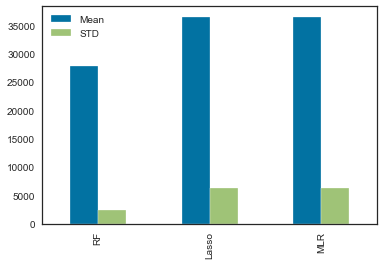

In [70]:
results_df.plot.bar();

In [71]:
px.bar(data_frame=results_df,y='Mean', error_y='STD')

In [83]:
bscv = BayesSearchCV(RandomForestRegressor(),
            {'n_estimators': Integer(100,500, prior='log-uniform'), 
            'min_samples_leaf':Integer(3,10)},
            cv=5,
            random_state=42,
            n_iter=20,
            scoring='neg_root_mean_squared_error')

In [84]:
bscv.fit(X_train_enc,y_train)

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
              random_state=42, scoring='neg_root_mean_squared_error',
              search_spaces={'min_samples_leaf': Integer(low=3, high=10, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=100, high=500, prior='log-uniform', transform='identity')})

In [85]:
bscv.best_score_

-27953.717092104678

In [86]:
bscv.best_params_

OrderedDict([('min_samples_leaf', 3), ('n_estimators', 373)])

In [87]:
bscv.score(X_test_enc,y_test)

-23993.670298949855

In [91]:
best_rf = bscv.best_estimator_

In [92]:
y_test_preds = best_rf.predict(X_test_enc)

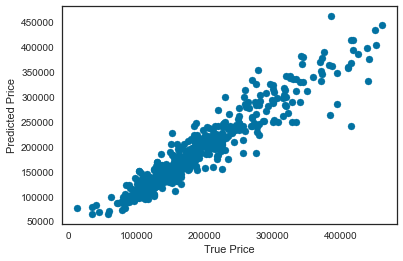

In [93]:
# plot predictions vs real value

plt.scatter(y_test,y_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price');

In [101]:
set(zip(X_test_enc.columns, best_rf))

{('1st Flr SF',
  DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                        random_state=1908318178)),
 ('2nd Flr SF',
  DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                        random_state=1739527528)),
 ('3Ssn Porch',
  DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                        random_state=1678382360)),
 ('Alley_Grvl',
  DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                        random_state=1653516406)),
 ('Alley_NA',
  DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                        random_state=1992292992)),
 ('Alley_Pave',
  DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                        random_state=136708312)),
 ('Bedroom AbvGr',
  DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                        random_state=2140314052)),
 ('Bldg Type_1Fam',
  DecisionTreeRegressor(max_features='auto', min_samples

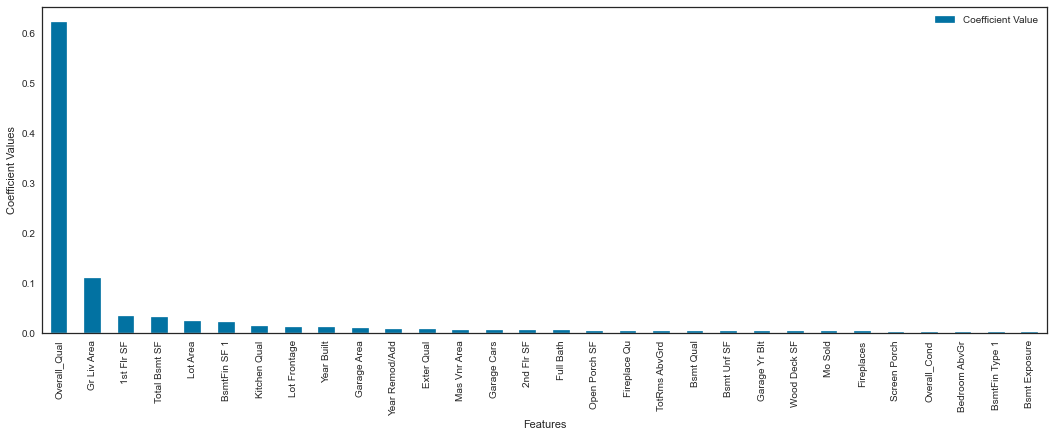

In [100]:
# rf feature importance

Influence = pd.DataFrame({
    'Features': X_test_enc.columns,
    'Coefficient Value': best_rf.feature_importances_}).set_index('Features')

Influence.sort_values(by ='Coefficient Value',inplace=True, ascending=False)
Influence.iloc[:30].plot.bar(figsize=(18,6))
plt.ylabel('Coefficient Values');